In [18]:
import pandas as pd

In [128]:
MAR = pd.read_csv('/Users/ashendrasharma/Desktop/untitled folder 3/INDIGOPNTS/march_2024_03.csv')
VAL = pd.read_csv('/Users/ashendrasharma/Desktop/untitled folder 3/INDIGOPNTS/validation_predictions.csv')

In [129]:
MAR = MAR.rename(columns={'tomorrowForecastDate': 'signalDate'})
MAR = MAR.rename(columns={'tomorrowActualPrice': 'Actual'})
MAR = MAR.rename(columns={'tomorrowForecastPrice': 'ForecastPrice'})


In [130]:
merged_data = pd.merge(MAR, VAL, on=['signalDate', 'Actual'], how='inner')

In [131]:
merged_data

,signalDate,Actual,ForecastPrice,Bagging_LR,Bagging_DT,Bagging_GB
0,2024-03-04,1388.45,1420.632589,1379.147663,1394.283,1390.402258
1,2024-03-05,1374.20,1436.636270,1370.550892,1395.816,1382.087785
2,2024-03-06,1363.55,1449.431703,1349.735754,1388.549,1371.919077
3,2024-03-10,1367.85,1446.634014,1355.445019,1390.710,1375.939167
4,2024-03-11,1337.20,1402.788396,1324.691200,1381.367,1361.505578
5,2024-03-13,1329.00,1381.489039,1323.768147,1332.720,1330.675049
6,2024-03-14,1341.45,1407.442561,1341.450826,1332.287,1330.483383
7,2024-03-18,1337.10,1359.670584,1338.731722,1334.751,1337.286072
8,2024-03-17,1337.20,1418.191761,1336.119184,1332.775,1330.221874
9,2024-03-19,1325.25,1369.794178,1319.976014,1328.316,1329.157270


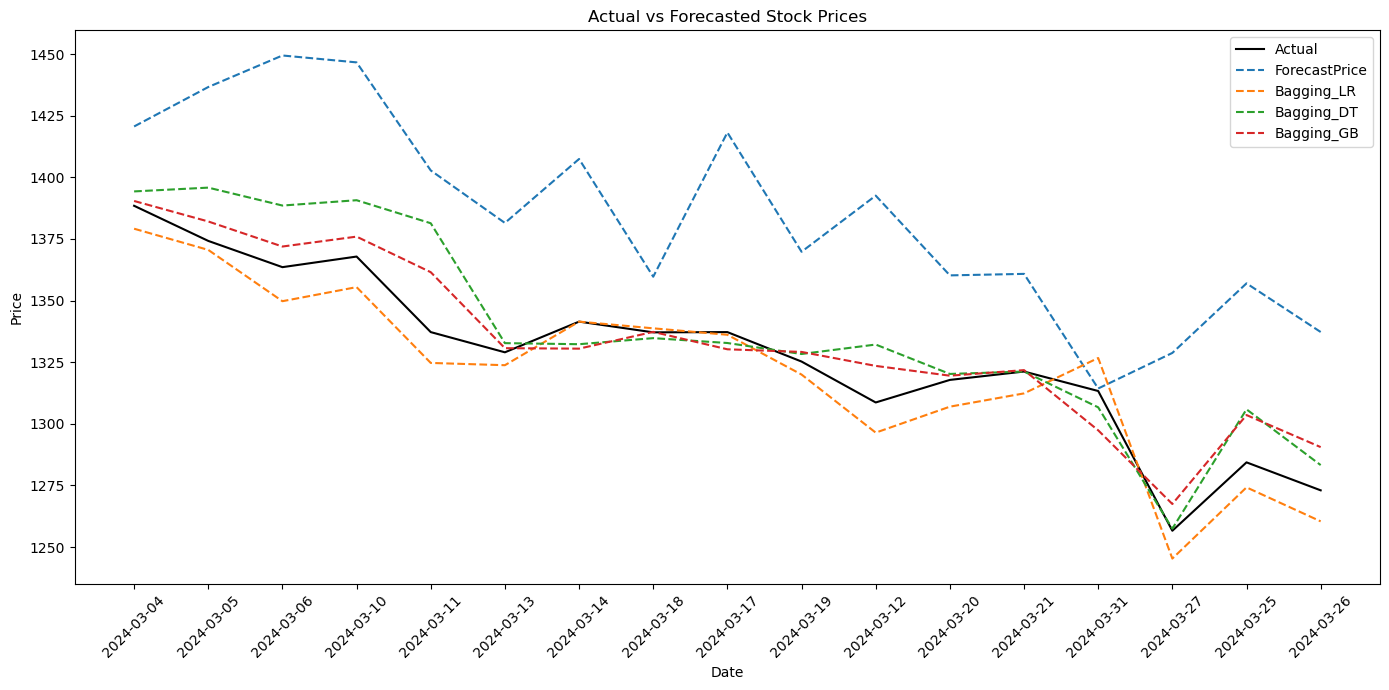

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

# Actual vs ForecastPrice
plt.plot(merged_data['signalDate'], merged_data['Actual'], label='Actual', color='black')
plt.plot(merged_data['signalDate'], merged_data['ForecastPrice'], label='ForecastPrice', linestyle='--')

# Forecasts from different models
plt.plot(merged_data['signalDate'], merged_data['Bagging_LR'], label='Bagging_LR', linestyle='--')
plt.plot(merged_data['signalDate'], merged_data['Bagging_DT'], label='Bagging_DT', linestyle='--')
plt.plot(merged_data['signalDate'], merged_data['Bagging_GB'], label='Bagging_GB', linestyle='--')

plt.title('Actual vs Forecasted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


In [134]:
merged_data['signalDate'] = pd.to_datetime(merged_data['signalDate'])

def calculate_percentage_error(actual, forecast):
    return ((forecast - actual) / actual) * 100

# Percentage errors for each forecasting model
merged_data['Error_ForecastPrice'] = calculate_percentage_error(merged_data['Actual'], merged_data['ForecastPrice'])
merged_data['Error_Bagging_LR'] = calculate_percentage_error(merged_data['Actual'], merged_data['Bagging_LR'])
merged_data['Error_Bagging_DT'] = calculate_percentage_error(merged_data['Actual'], merged_data['Bagging_DT'])
merged_data['Error_Bagging_GB'] = calculate_percentage_error(merged_data['Actual'], merged_data['Bagging_GB'])

In [136]:
merged_data['signalDate'] = pd.to_datetime(merged_data['signalDate'])

def calculate_percentage_error(actual, forecast):
    return ((forecast - actual) / actual) * 100

# Percentage errors for each forecasting model
merged_data['Pct_Error_ForecastPrice'] = calculate_percentage_error(merged_data['Actual'], merged_data['ForecastPrice'])
merged_data['Pct_Error_Bagging_LR'] = calculate_percentage_error(merged_data['Actual'], merged_data['Bagging_LR'])
merged_data['Pct_Error_Bagging_DT'] = calculate_percentage_error(merged_data['Actual'], merged_data['Bagging_DT'])
merged_data['Pct_Error_Bagging_GB'] = calculate_percentage_error(merged_data['Actual'], merged_data['Bagging_GB'])

print("Percentage Errors for Forecasting Models:")
merged_data[['signalDate', 'Pct_Error_ForecastPrice', 'Pct_Error_Bagging_LR', 'Pct_Error_Bagging_DT', 'Pct_Error_Bagging_GB']]

Percentage Errors for Forecasting Models:


,signalDate,Pct_Error_ForecastPrice,Pct_Error_Bagging_LR,Pct_Error_Bagging_DT,Pct_Error_Bagging_GB
0,2024-03-04,2.317879,-0.669980,0.420109,0.140607
1,2024-03-05,4.543463,-0.265544,1.572988,0.573991
2,2024-03-06,6.298390,-1.013109,1.833376,0.613771
3,2024-03-10,5.759697,-0.906896,1.671236,0.591378
4,2024-03-11,4.904905,-0.935447,3.302946,1.817647
5,2024-03-13,3.949514,-0.393668,0.279910,0.126038
6,2024-03-14,4.919495,0.000062,-0.683067,-0.817520
7,2024-03-18,1.688025,0.122034,-0.175679,0.013916
8,2024-03-17,6.056817,-0.080827,-0.330915,-0.521846
9,2024-03-19,3.361191,-0.397962,0.231353,0.294833


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

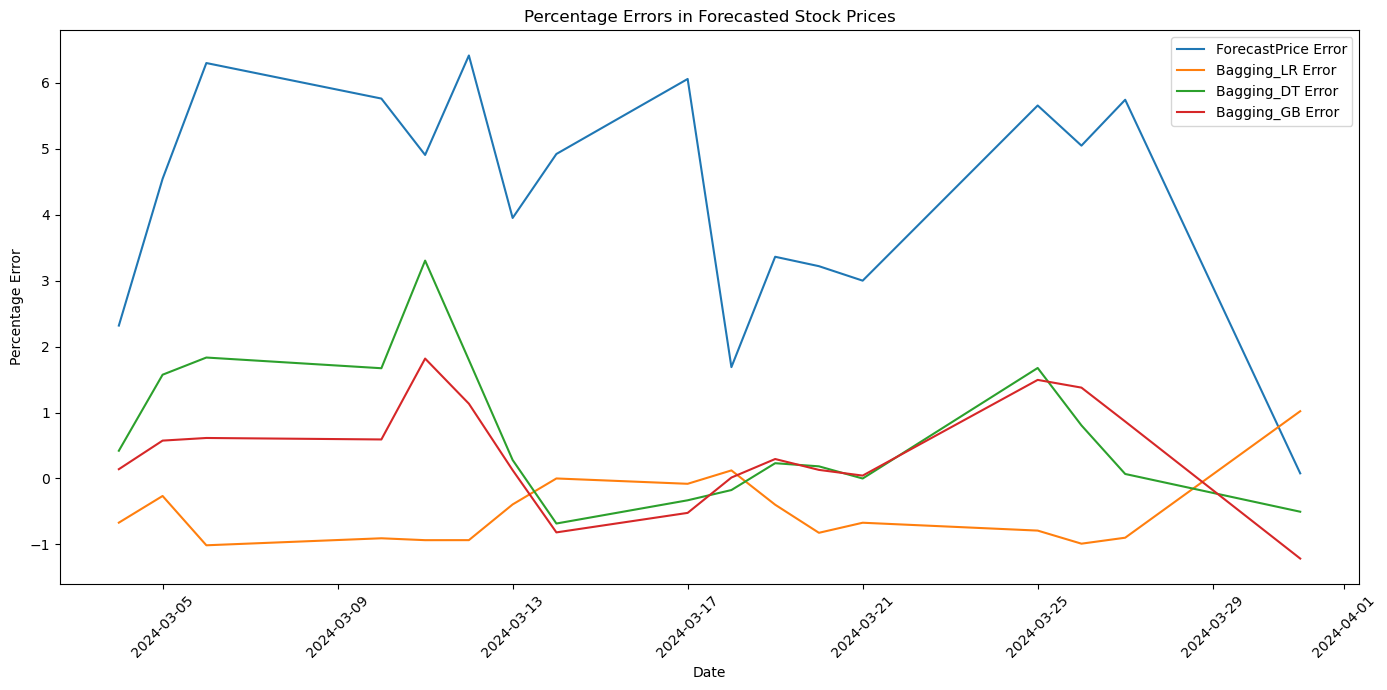

In [137]:
plt.figure(figsize=(14, 7))

sns.lineplot(x='signalDate', y='Pct_Error_ForecastPrice', data=merged_data, label='ForecastPrice Error')
sns.lineplot(x='signalDate', y='Pct_Error_Bagging_LR', data=merged_data, label='Bagging_LR Error')
sns.lineplot(x='signalDate', y='Pct_Error_Bagging_DT', data=merged_data, label='Bagging_DT Error')
sns.lineplot(x='signalDate', y='Pct_Error_Bagging_GB', data=merged_data, label='Bagging_GB Error')

plt.title('Percentage Errors in Forecasted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Error')
plt.legend()
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()